In [1]:
import sys
import os
#os.environ['HF_HOME'] = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/hf"

In [2]:
os.environ['HF_HOME']

'/n/netscratch/konkle_lab/Everyone/Jingxuan/huggingface'

In [3]:
from transformers.utils import logging

cache_path = logging.get_verbosity()  # Default verbosity setup
print(f"Transformers cache directory: {cache_path}")

Transformers cache directory: 30


/n/home03/fjxdaisy/.conda/envs/torch2/lib/python3.10/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [4]:
import accelerate
print(accelerate.__version__)


1.0.1


In [5]:
from huggingface_hub import login
hf_token = os.getenv('HUGGINGFACE_TOKEN')
#hf_token
# Replace 'your_token' with your actual Hugging Face token
login(hf_token, add_to_git_credential=True)

Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /n/netscratch/konkle_lab/Everyone/Jingxuan/huggingface/token
Login successful


In [6]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-large-turbo", torch_dtype=torch.bfloat16)
pipe = pipe.to("cuda")

image = pipe(
    "A capybara holding a sign that reads Hello Fast World",
    num_inference_steps=4,
    guidance_scale=0.0,
).images[0]
#image.save("capybara.png")

/n/home03/fjxdaisy/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: '/n/home03/fjxdaisy/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSsb'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

/n/home03/fjxdaisy/.conda/envs/torch2/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


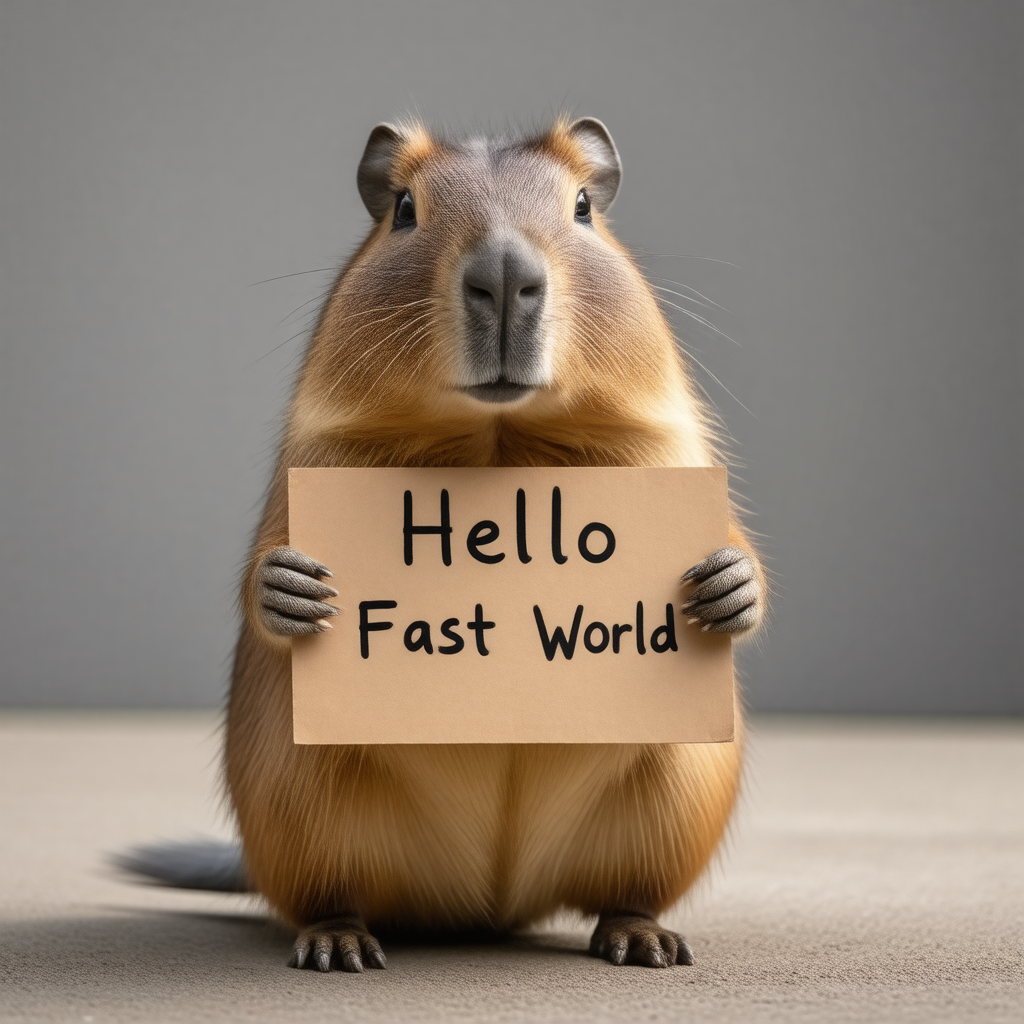

In [7]:
image

In [8]:
def generate_and_save_images(prompts, model, output_dir):
    """
    Generate and save images using a pretrained model and list of prompts.

    Args:
        prompts (list of str): A list of text prompts for generating images.
        model: The pretrained model pipeline for inference.
        output_dir (str): Directory where the images will be saved.

    Returns:
        None
    """
    import os
    os.makedirs(output_dir, exist_ok=True)

    for idx, prompt in enumerate(prompts, start=1):
        # Generate image
        image = model(prompt).images[0]

        # Create a valid filename with numbering
        filename_base = "".join(c if c.isalnum() else "_" for c in prompt)
        filename = f"{filename_base}_{idx:06d}.png"
        image_path = os.path.join(output_dir, filename)

        # Save image
        image.save(image_path)
        print(f"Image saved: {image_path}")


In [9]:

prompts = [
            "triangle is to the upper left of square", 
            "blue triangle is to the upper left of red square", 
            "triangle is above and to the right of square", 
            "blue circle is above and to the right of blue square", 
            "triangle is to the left of square", 
            "triangle is to the left of triangle", 
            "circle is below red square",
            "red circle is to the left of blue square",
            "blue square is to the right of red circle",
            "red circle is above square",
            "triangle is above red circle",
            "blue triangle is above red triangle", 
            "blue circle is above blue square", 
        ]
output_dir = "../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt"
generate_and_save_images(prompts, pipe, output_dir)


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/triangle_is_to_the_upper_left_of_square_000001.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/blue_triangle_is_to_the_upper_left_of_red_square_000002.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/triangle_is_above_and_to_the_right_of_square_000003.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/blue_circle_is_above_and_to_the_right_of_blue_square_000004.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/triangle_is_to_the_left_of_square_000005.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/triangle_is_to_the_left_of_triangle_000006.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/circle_is_below_red_square_000007.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/red_circle_is_to_the_left_of_blue_square_000008.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/blue_square_is_to_the_right_of_red_circle_000009.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/red_circle_is_above_square_000010.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/triangle_is_above_red_circle_000011.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/blue_triangle_is_above_red_triangle_000012.png


  0%|          | 0/28 [00:00<?, ?it/s]

Image saved: ../T2I-CompBench-main/examples/samples/stable-diffusion-3.5-large-turbo_ourprompt/blue_circle_is_above_blue_square_000013.png


### Architecture

In [13]:
pipe

StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stabilityai/stable-diffusion-3.5-large-turbo",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Diffusion Scheduler

In [17]:
pipe.scheduler

FlowMatchEulerDiscreteScheduler {
  "_class_name": "FlowMatchEulerDiscreteScheduler",
  "_diffusers_version": "0.31.0",
  "base_image_seq_len": 256,
  "base_shift": 0.5,
  "max_image_seq_len": 4096,
  "max_shift": 1.15,
  "num_train_timesteps": 1000,
  "shift": 3.0,
  "use_dynamic_shifting": false
}

### Main DiT model

In [25]:
# relevant blocks 
from diffusers.models.transformers.transformer_sd3 import SD3Transformer2DModel
from diffusers.models.attention import JointTransformerBlock
from diffusers.models.embeddings import CombinedTimestepTextProjEmbeddings

In [28]:
type(pipe.transformer.transformer_blocks[0])

diffusers.models.attention.JointTransformerBlock

In [24]:
type(pipe.transformer.time_text_embed)

diffusers.models.embeddings.CombinedTimestepTextProjEmbeddings

In [11]:
pipe.transformer

SD3Transformer2DModel(
  (pos_embed): PatchEmbed(
    (proj): Conv2d(16, 2432, kernel_size=(2, 2), stride=(2, 2))
  )
  (time_text_embed): CombinedTimestepTextProjEmbeddings(
    (time_proj): Timesteps()
    (timestep_embedder): TimestepEmbedding(
      (linear_1): Linear(in_features=256, out_features=2432, bias=True)
      (act): SiLU()
      (linear_2): Linear(in_features=2432, out_features=2432, bias=True)
    )
    (text_embedder): PixArtAlphaTextProjection(
      (linear_1): Linear(in_features=2048, out_features=2432, bias=True)
      (act_1): SiLU()
      (linear_2): Linear(in_features=2432, out_features=2432, bias=True)
    )
  )
  (context_embedder): Linear(in_features=4096, out_features=2432, bias=True)
  (transformer_blocks): ModuleList(
    (0-36): 37 x JointTransformerBlock(
      (norm1): AdaLayerNormZero(
        (silu): SiLU()
        (linear): Linear(in_features=2432, out_features=14592, bias=True)
        (norm): LayerNorm((2432,), eps=1e-06, elementwise_affine=False)


### Text Encoder

In [19]:
pipe.text_encoder

CLIPTextModelWithProjection(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerN

In [20]:
pipe.text_encoder_2

CLIPTextModelWithProjection(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 1280)
      (position_embedding): Embedding(77, 1280)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-31): 32 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (layer_norm1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1280, out_features=5120, bias=True)
            (fc2): Linear(in_features=5120, out_features=1280, bias=True)
          )
          (layer_norm2)

In [22]:
pipe.text_encoder_3

T5EncoderModel(
  (shared): Embedding(32128, 4096)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 4096)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=4096, out_features=4096, bias=False)
              (k): Linear(in_features=4096, out_features=4096, bias=False)
              (v): Linear(in_features=4096, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=4096, bias=False)
              (relative_attention_bias): Embedding(32, 64)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=4096, out_features=10240, bias=False)
              (wi_1): Linear(in_features=4096, out_features=10240, bias=False)
              (wo